In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
X_train.shape

(8000, 11)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
X_train_scaled

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='binary_crossentropy', optimizer='Adam' , metrics=['accuracy'])

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 0.5194 - accuracy: 0.7825 - val_loss: 0.4510 - val_accuracy: 0.8181
Epoch 2/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4307 - accuracy: 0.8178 - val_loss: 0.4188 - val_accuracy: 0.8194
Epoch 3/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4055 - accuracy: 0.8320 - val_loss: 0.4037 - val_accuracy: 0.8250
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3914 - accuracy: 0.8397 - val_loss: 0.3940 - val_accuracy: 0.8275
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3812 - accuracy: 0.8438 - val_loss: 0.3870 - val_accuracy: 0.8350
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3739 - accuracy: 0.8458 - val_loss: 0.3811 - val_accuracy: 0.8375
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3675 - accuracy: 0.8514 - val_loss: 0.3769 - val_accuracy: 0.8431

Epoch 58/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3274 - accuracy: 0.8612 - val_loss: 0.3532 - val_accuracy: 0.8562
Epoch 59/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3264 - accuracy: 0.8639 - val_loss: 0.3538 - val_accuracy: 0.8556
Epoch 60/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3273 - accuracy: 0.8639 - val_loss: 0.3528 - val_accuracy: 0.8550
Epoch 61/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3265 - accuracy: 0.8625 - val_loss: 0.3536 - val_accuracy: 0.8525
Epoch 62/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3262 - accuracy: 0.8645 - val_loss: 0.3539 - val_accuracy: 0.8531
Epoch 63/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3256 - accuracy: 0.8631 - val_loss: 0.3545 - val_accuracy: 0.8544
Epoch 64/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3259 - accuracy: 0.8636 - val_loss: 0.3526 - val_accuracy:

In [22]:
model.layers[1].get_weights()

[array([[-0.11530899,  0.35411507, -0.56085336,  0.4534432 ,  0.07712989,
          0.30528462,  0.09984352, -0.5026925 , -0.6025439 ,  0.24992558,
          0.12213184],
        [ 0.56972295, -0.27721724,  0.17610352, -0.26201597,  0.93019444,
          0.04649181,  0.49295518,  0.15906458, -1.6072283 , -0.6723604 ,
          0.84674454],
        [ 0.27379242, -0.19311698, -0.11190786, -0.03618174,  0.20187129,
         -0.12792449, -0.15303184,  0.2735726 ,  0.03256544, -0.17691289,
          0.56866956],
        [ 0.6207751 , -0.56370866,  0.2933808 ,  0.34754214, -0.32747465,
         -0.21700254, -0.32739514, -0.7746932 , -1.6522117 , -0.18729031,
         -0.08449683],
        [-0.6537265 , -0.9354156 ,  0.47754073,  0.11881875,  0.20689984,
         -0.07642422,  0.48943853, -0.16780433, -0.15710975,  0.1460472 ,
         -0.30618176],
        [ 0.05545399, -0.41502666,  0.3010642 ,  0.25565398, -0.75302327,
          0.6486533 ,  0.4527702 ,  0.6314879 , -0.04736995,  0.3539347

In [23]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [24]:
y_pred = np.where(y_log > 0.5 ,1 ,0)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8595

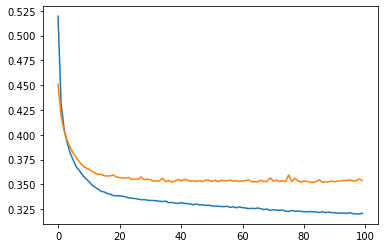

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])